In [1]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Data

In [23]:
df = pd.read_csv('data/adult.data',
                 names=['age', 'workclass', 'fnlwgt',
                        'education', 'education-num', 'marital-status',
                        'occupation', 'relationship', 'race',
                        'gender', 'capital-gain', 'capital-loss',
                        'hours-per-week', 'native-country', 'salary'])

In [24]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
df_obj = df.select_dtypes(['object'])

In [27]:
df_obj.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'salary'],
      dtype='object')

In [28]:
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [29]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [30]:
df['gender'].value_counts()

Male      21790
Female    10771
Name: gender, dtype: int64

In [31]:
df_wb_mf = df[(df['race'].isin(['White', 'Black'])) & 
              (df['gender'].isin(['Male', 'Female']))].reset_index(drop=True)

In [32]:
df_wb_mf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Distribution Analysis

In [33]:
def plot_vc_bar_charts(df, col, ax, color='b'):
    df_vc = df[col].value_counts() / len(df) * 100
    df_vc = df_vc.reset_index()
    df_vc = df_vc.rename(columns={'index': col, col: 'pc'})
    
    bar_width = 0.35
    opacity = 0.9
    labels = df_vc[col].values
    capitalized_labels = []
    for label in labels:
        words = label.split(' ')
        capitalized_label = ' '.join([w.capitalize() for w in words])
        capitalized_labels.append(capitalized_label)
    sizes = df_vc['pc'].values
    index = np.arange(len(sizes))
    
    ax.bar(index, sizes, bar_width,
           alpha=opacity,
           label=labels,
           color=color)
    ax.set_xticks(index)
    ax.set_xticklabels(capitalized_labels)
    ax.grid(True);

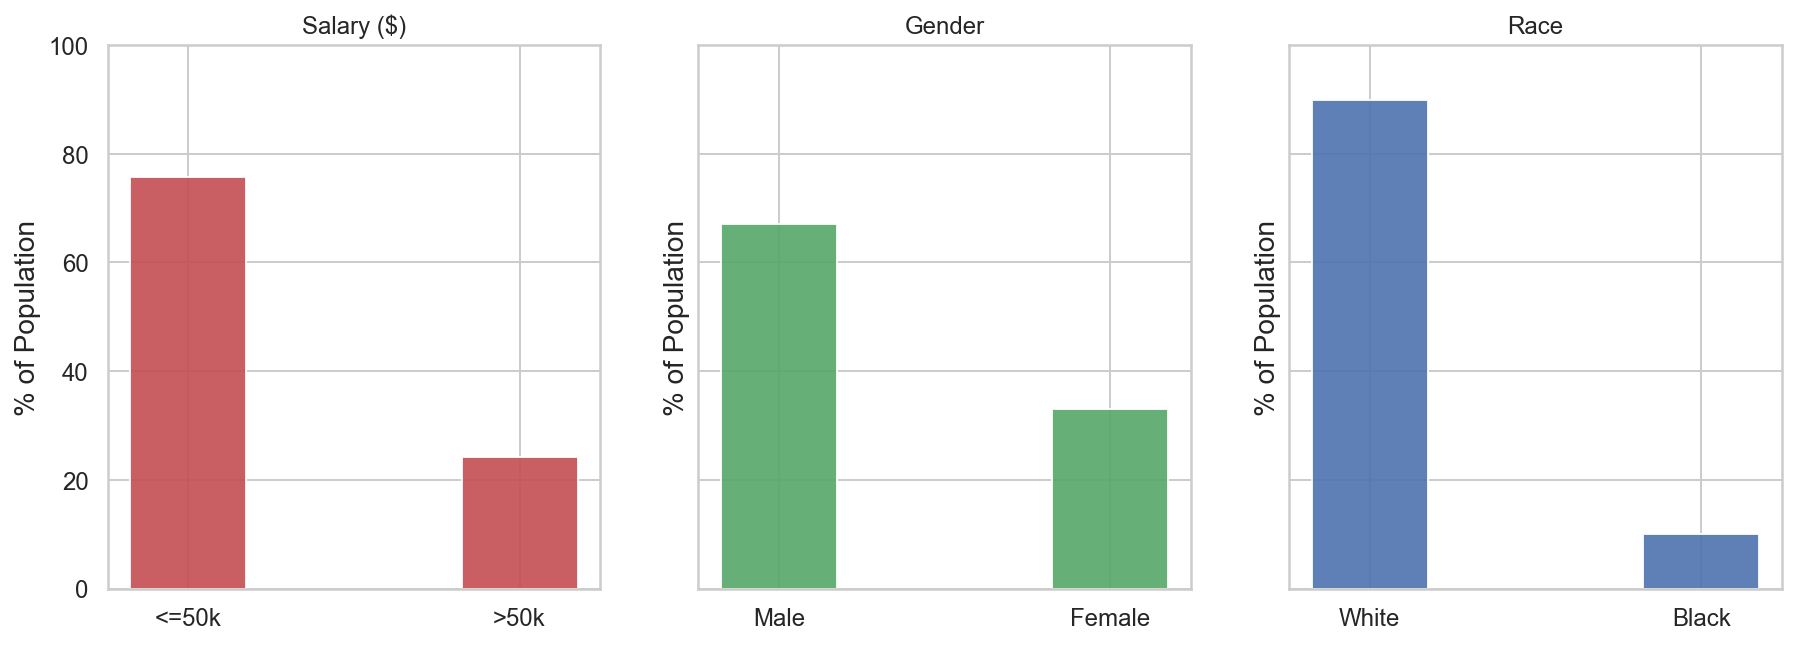

In [40]:
f, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plot_vc_bar_charts(df_wb_mf, 'salary', ax=ax[0], color='r')
plot_vc_bar_charts(df_wb_mf, 'gender', ax=ax[1], color='g')
plot_vc_bar_charts(df_wb_mf, 'race', ax=ax[2], color='b')
ax[0].set_title('Salary ($)')
ax[1].set_title('Gender');
ax[2].set_title('Race');
ax[0].set_ylabel('% of Population');
ax[1].set_ylabel('% of Population');
ax[2].set_ylabel('% of Population');
ax[0].set_ylim([0, 100])
ax[1].set_ylim([0, 100])
ax[2].set_ylim([0, 100]);
f.savefig('images/chapter_08_salary_gender_race_vc_pc.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_08_salary_gender_race_vc_pc.pdf', format='pdf', dpi=300, bbox_inches='tight');

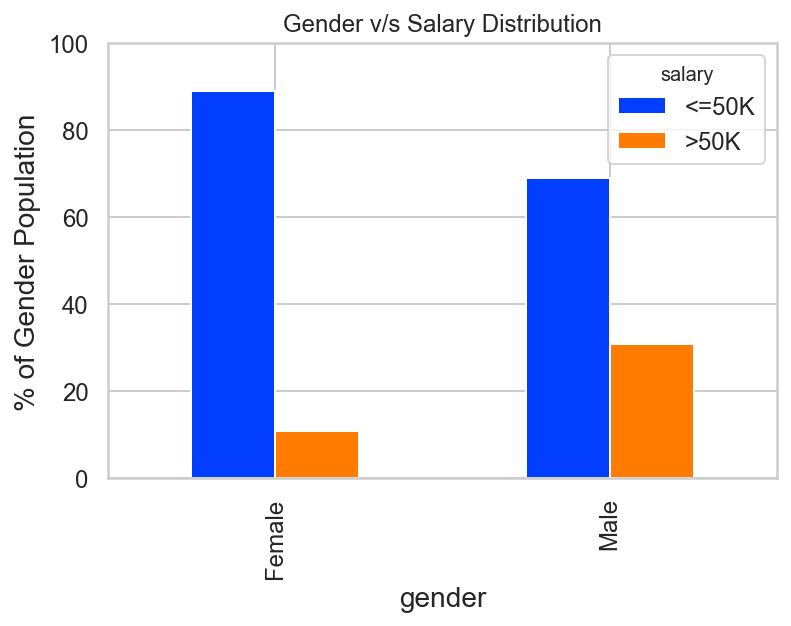

In [52]:
gender = round(pd.crosstab(df_wb_mf.gender, 
                           df_wb_mf.salary).\
               div(pd.crosstab(df_wb_mf.gender, 
                               df_wb_mf.salary).apply(sum, 1), 0), 2)
gender.sort_values(by = '>50K', inplace = True)
gender = gender * 100
f, ax = plt.subplots()
gender.plot(kind='bar', 
            title='Gender v/s Salary Distribution', 
            ax=ax)
ax.set_ylim([0, 100])
ax.set_ylabel('% of Gender Population');
f.savefig('images/chapter_08_salary_vs_gender_dist.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_08_salary_vs_gender_dist.pdf', format='pdf', dpi=300, bbox_inches='tight');

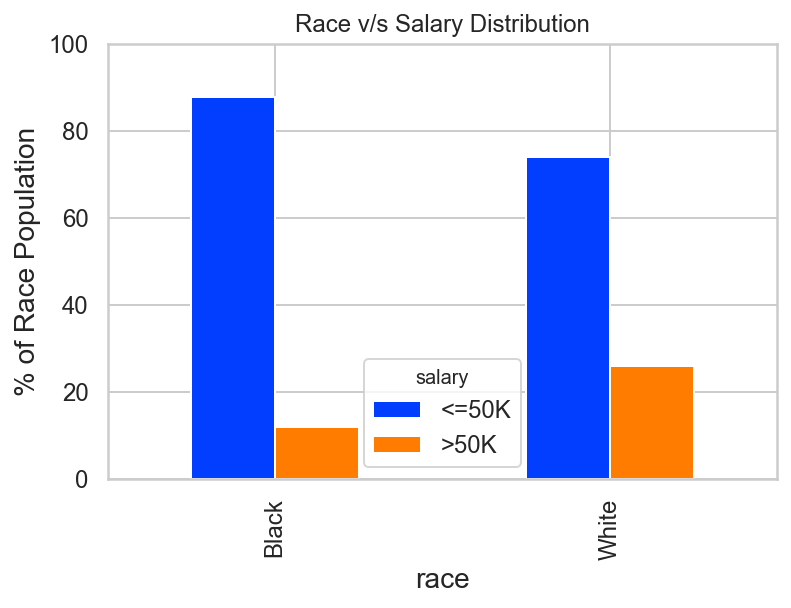

In [54]:
race = round(pd.crosstab(df_wb_mf.race, 
                         df_wb_mf.salary).\
             div(pd.crosstab(df_wb_mf.race, 
                             df_wb_mf.salary).apply(sum, 1), 0), 2)
race.sort_values(by='>50K', inplace=True)
race = race * 100
f, ax = plt.subplots()
race.plot(kind='bar', 
          title='Race v/s Salary Distribution', 
          ax=ax)
ax.set_ylim([0, 100])
ax.set_ylabel('% of Race Population');
f.savefig('images/chapter_08_salary_vs_race_dist.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_08_salary_vs_race_dist.pdf', format='pdf', dpi=300, bbox_inches='tight');

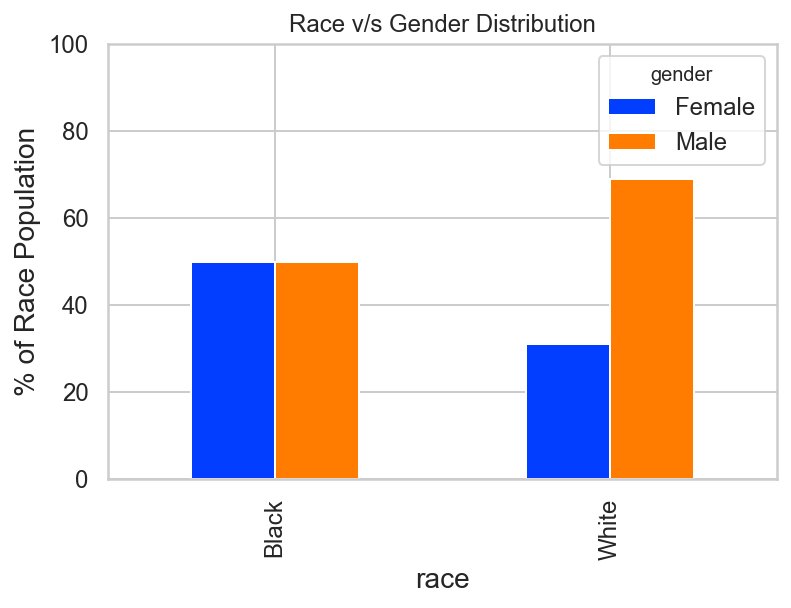

In [57]:
rg = round(pd.crosstab(df_wb_mf.race, 
                       df_wb_mf.gender).\
           div(pd.crosstab(df_wb_mf.race, 
                           df_wb_mf.gender).apply(sum, 1), 0), 2)
rg = rg * 100
f, ax = plt.subplots()
rg.plot(kind='bar', 
        title='Race v/s Gender Distribution', 
        ax=ax)
ax.set_ylim([0, 100])
ax.set_ylabel('% of Race Population');
f.savefig('images/chapter_08_gender_vs_race_dist.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_08_gender_vs_race_dist.pdf', format='pdf', dpi=300, bbox_inches='tight');